In [1]:
import processing_functions as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
import scipy.stats as stats
import scipy.optimize as opt
from astropy.io import fits
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

# **1s**

In [2]:
lc1_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q0.lc'
lc2_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q1.lc'
lc3_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q2.lc'
lc4_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/AS1G05_102T01_9000000650_05136cztM0_level2_quad_clean_Q3.lc'

lc1_1_data = pf.openlc(lc1_1)
lc2_1_data = pf.openlc(lc2_1)
lc3_1_data = pf.openlc(lc3_1)
lc4_1_data = pf.openlc(lc4_1)

total_counts = lc1_1_data['RATE'] + lc2_1_data['RATE'] + lc3_1_data['RATE'] + lc4_1_data['RATE']
total_lc_1 = '/home/ravioli/astro/ksp/grb/GRB160909A/1s/GRB160909A-total-counts.lc'

total_lc_1_data = pf.openlc(total_lc_1)

In [3]:
max_1 = np.where(total_counts == np.max(total_counts[758:858]))[0][0]
start_1 = max_1-15
end_1 = max_1+5

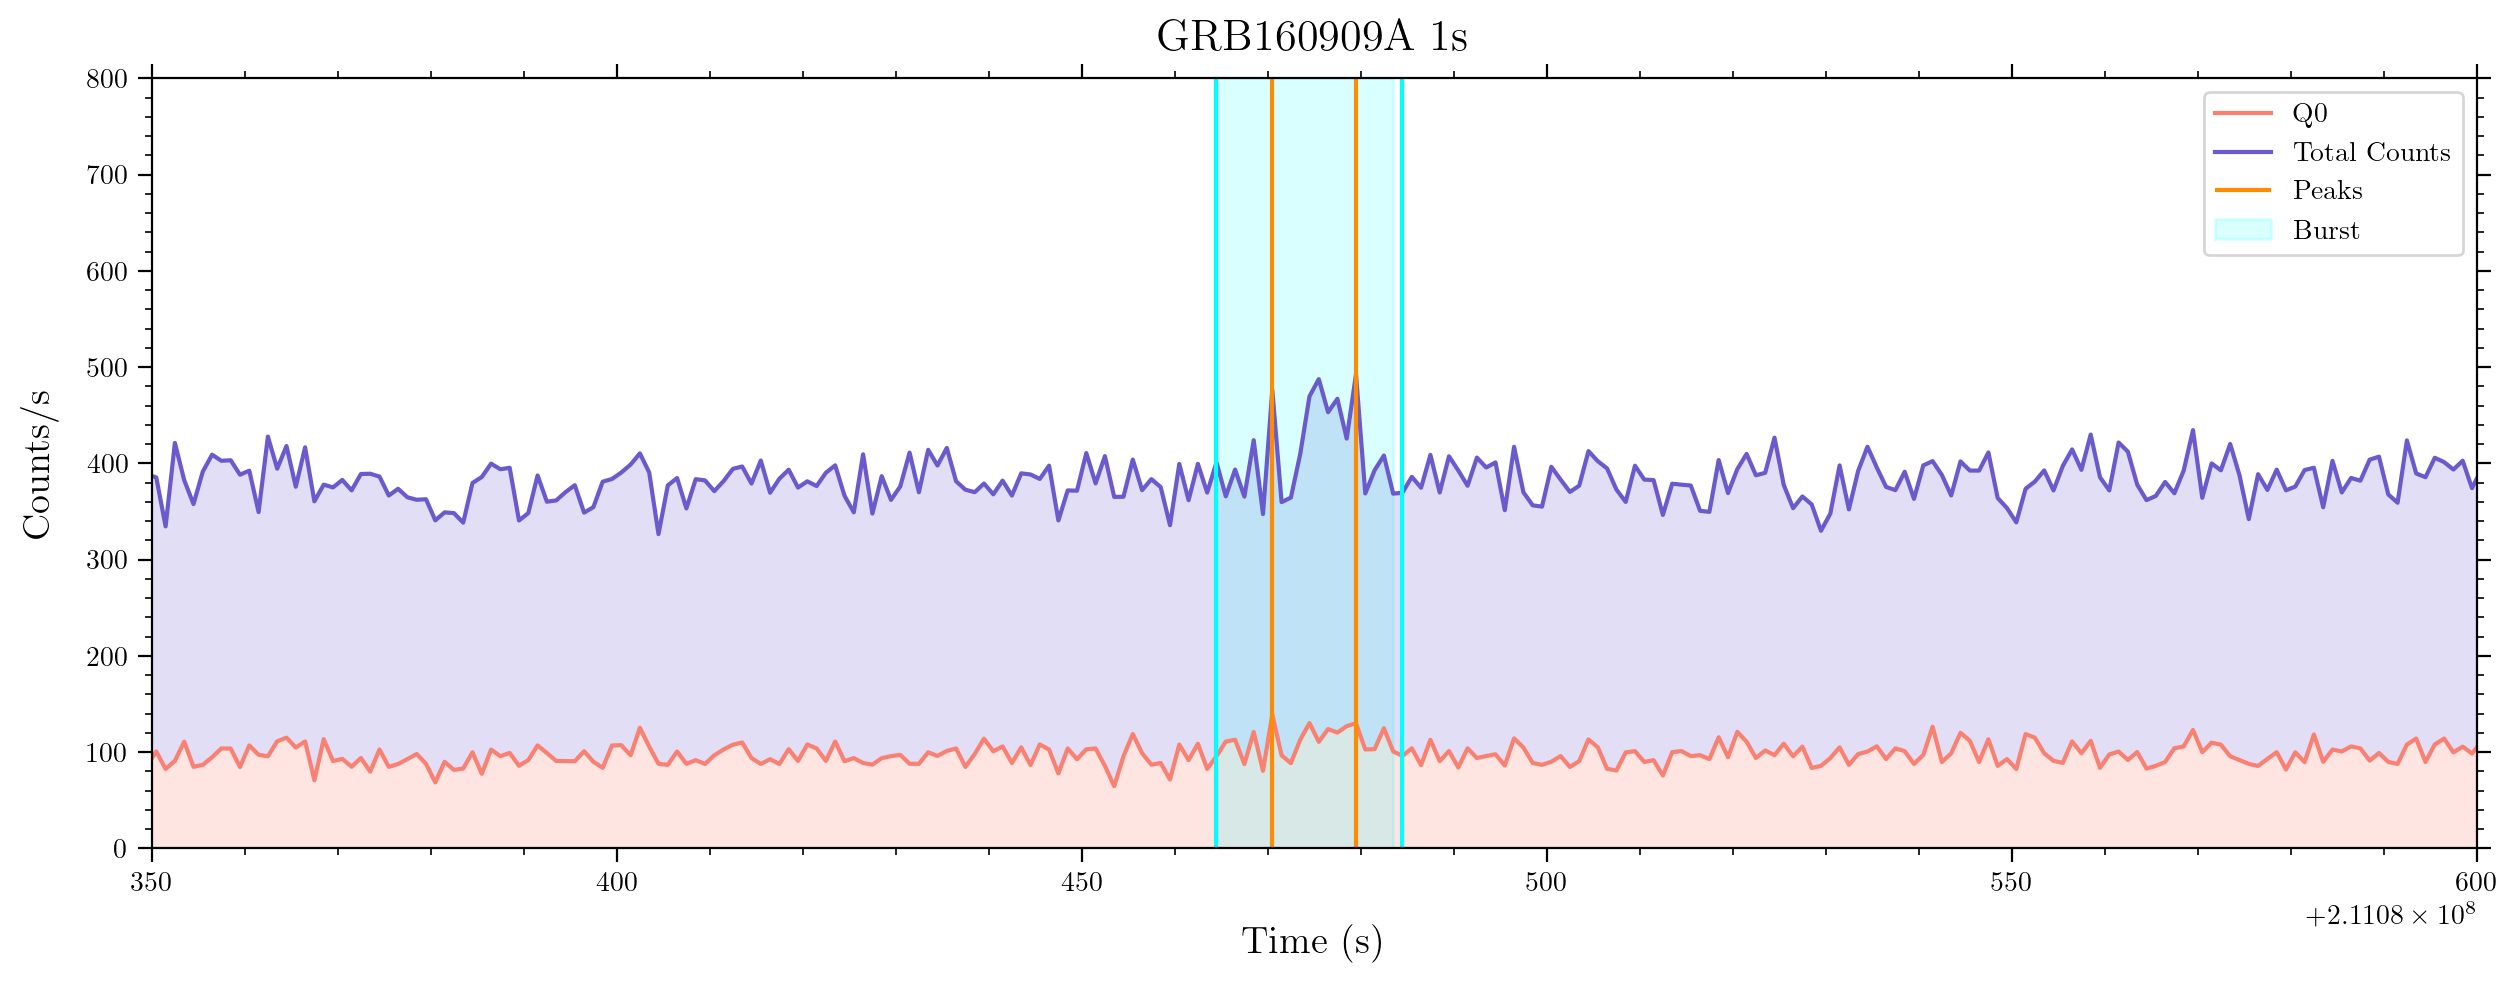

In [4]:
plt.figure(figsize=(15,5), dpi=200)
plt.plot(lc1_1_data['TIME'],lc1_1_data['RATE'], label='Q0', color='salmon')
plt.plot(total_lc_1_data['TIME'],total_counts, label='Total Counts', color = 'slateblue')
plt.xlim(211080350, 211080600)
plt.ylim(0, 800)
plt.vlines(total_lc_1_data['TIME'][start_1], 0, 800, color='cyan')
plt.vlines(total_lc_1_data['TIME'][end_1], 0, 800, color='cyan')
plt.vlines(total_lc_1_data['TIME'][max_1], 0, 800, color='darkorange', label='Peaks')
plt.vlines(total_lc_1_data['TIME'][max_1-9], 0, 800, color='darkorange')
plt.fill_between(total_lc_1_data['TIME'], lc1_1_data['RATE'], total_counts, color='slateblue', alpha=0.2)
plt.fill_between(total_lc_1_data['TIME'], 0, lc1_1_data['RATE'], color='salmon', alpha=0.2)
plt.fill_between(total_lc_1_data['TIME'][start_1:end_1],800, color='cyan', alpha=0.15, label="Burst")
plt.xlabel('Time (s)', labelpad=10, fontsize=14)
plt.ylabel('Counts/s', labelpad=10, fontsize=14)
plt.title('GRB160909A 1s', fontsize=16, pad=10)
plt.legend()
plt.show()

In [5]:
snr_gauss_1, *_ = pf.snr_gauss(total_lc_1, start_1, end_1, in_bins=200)
snr_gamma_1, *_ = pf.snr_gamma(total_lc_1, start_1, end_1, in_bins=200)
snr_skewnorm_1, *_ = pf.snr_skewnorm(total_lc_1, start_1, end_1, in_bins=200)
snr_poisson_1, *_ = pf.snr_poisson(total_lc_1, start_1, end_1, in_bins=200)

In [6]:
print("SNR for Gaussian Fit: ", snr_gauss_1)
print("SNR for Gamma Fit: ", snr_gamma_1)
print("SNR for Skewnorm Fit: ", snr_skewnorm_1)
print("SNR for Poisson Fit: ", snr_poisson_1)

SNR for Gaussian Fit:  1.058297526613587
SNR for Gamma Fit:  1.0073031318815873
SNR for Skewnorm Fit:  1.0294509841986026
SNR for Poisson Fit:  1.004266058280188
